# Bibliotecas:

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import codecs

# Exercicio 3:
##### Criar uma função que recebe o nome do arquivo de dado como argumento e retorne: a latitude e longitude da estação; o nome da primeira cidade mais próxima da estação de medida (nearby cities).

In [3]:
def localização(arquivo):
    
# Retirando a latitude e longitude 
    texto = codecs.open (arquivo, 'rb', encoding='utf-8')
    lat_long = texto.readlines()[4][1:].strip()

# Retirando o nome das cidades proximas
    texto = codecs.open (arquivo, 'rb', encoding='utf-8')
    
    citys_nearby = texto.readlines()[35][19:-1]
    lista_cidades = citys_nearby.split(",")
    city_nearby = lista_cidades[0]
    
    return (lat_long , city_nearby)

In [4]:
localização('./dados/23.31S-42.82W-TAVG-Trend.txt')

('23.31 S, 42.82 W', 'Rio de Janeiro')

# Exercício 4:

#### (Criar uma função que recebe o nome do arquivo de dado como argumento e retorne: um numpy array da temperatura anual estimada, que será a soma da temperatura absoluta estimada (retirar do cabeçalho do arquivo) com a anomalia anual.)

In [5]:
def tem_estimada(arquivo_dados):

# Temperatura anual estimada
    abs_anual = open(arquivo_dados)
    linha = abs_anual.readlines()[47].split()
    temp_abs_anual = np.array(linha[8:9])
    temp_final = temp_abs_anual[0]
    
# Tabela com as anomalias anuais
    tabela = np.loadtxt (arquivo_dados, comments="%")
    anual_anomaly = tabela[:,4]
    anomaly_final = np.array(anual_anomaly)
    
# Criando uma tabela com a soma da temperatura e anomalia
    final = []
    
    for elementos in anomaly_final:
        final.append (float(elementos) + float(temp_final))
        
    temp_anual_estimada = np.array(final)
    
    return (temp_anual_estimada)

In [6]:
tem_estimada("dados/0.80S-49.02W-TAVG-Trend.txt")

array([    nan,     nan,  25.868, ...,     nan,     nan,     nan])

# Exercicio 5:
#### (Faça gráficos da temperatura anual estimada para cada estação da pasta dados referente a uma cidade (não o do Brasil todo), com o título de cada gráfico contendo a latitude e longitude. Os gráficos devem ser salvos com o nome da cidade extraída no item 3 em formato png(caso o nome seja composto, substitua os espaços por _): ex.Porto_Alegre.png.)

In [55]:
def fragmentar_dados(dados):
    
    temp_anual1 = tem_estimada(item)
    
    tabela = (np.loadtxt (dados, comments = "%"))
    anos = tabela[:, 0]
    meses = tabela[:, 1]
    ano_decimal1 = (meses - 1)/12 + anos
    anomalia_10anos1 = tabela [:,8]
    unc_10anos1 = tabela [:, 9]
    unc_95pos1 = (anomalia_10anos1 + unc_10anos1)
    unc_95neg1 = (anomalia_10anos1 - unc_10anos1)
    
    return (ano_decimal1, temp_anual1, anomalia_10anos1, unc_95pos1, unc_95neg1)

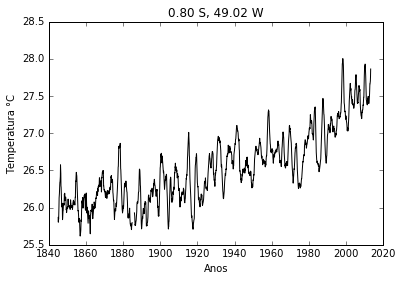

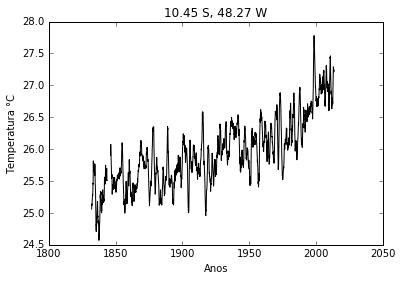

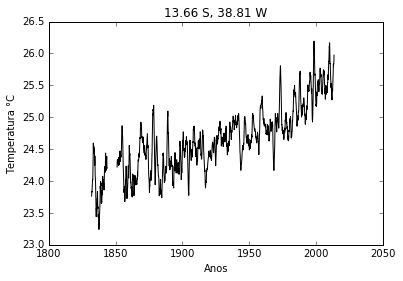

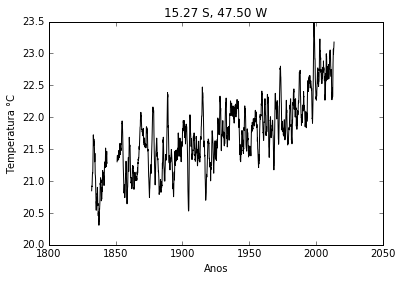

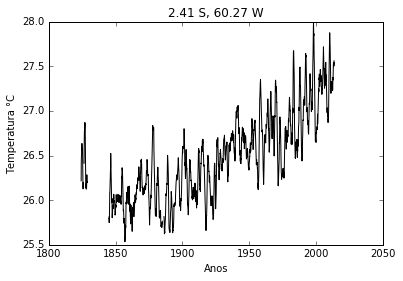

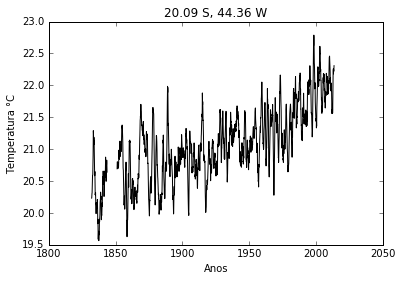

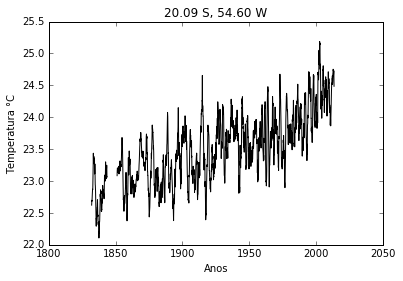

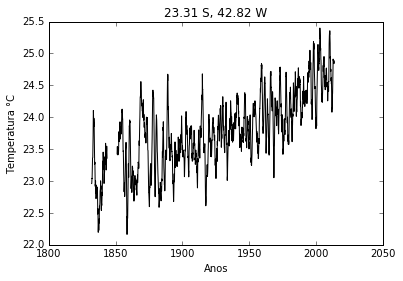

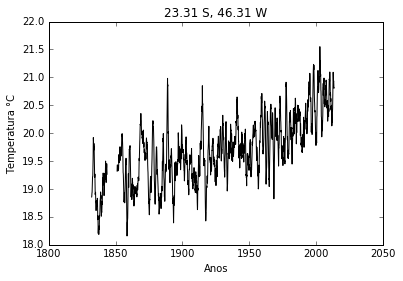

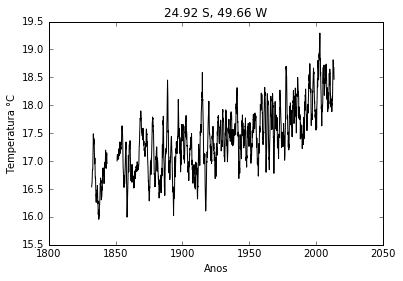

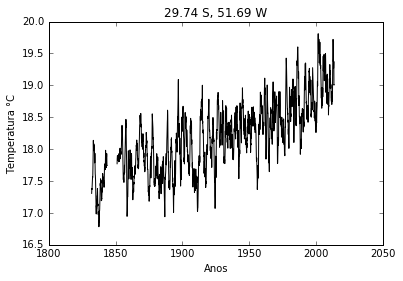

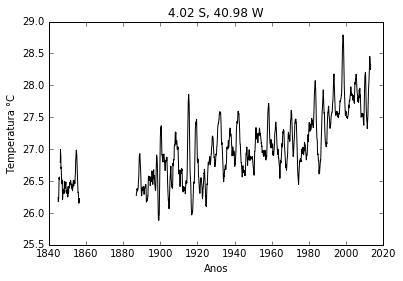

In [56]:
nome_arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

#Começamos a repetição para todos os arquivos da variavel "nome_arquivos"
for item in nome_arquivos:
    
    #Primeiro de tudo, criamos as variáveis
    
    ano_decimal, temp_anual, anomalia_10anos, unc_95pos, unc_95neg = fragmentar_dados (item)
    
    lat_long , city_nearby = localização (item)
    
    nome_grafico = city_nearby.replace(" ","_")
    
    #Agora criamos o gráfico
    plt.figure()
    
    plt.plot (ano_decimal, temp_anual, c = "#000000")
    
    #Definimos os nomes de cada eixo
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura °C")
    plt.title (lat_long)

    #Finalmente salvamos a figura em formato png com o nome dos próprios arquivos que extraimos os dados, na pasta "exercicio5"
    plt.savefig ("exercicio5/" + nome_grafico + ".png", format = "png")

# Bonus:
#### (Repetir o item 5 substituindo a temperatura absoluta estimada pela mensal absoluta estimada. Atenção: nesse caso é preciso usar a anomalia mensal respectiva de cada mês (Month 1 = Jan,Month 2 = Fev etc). Para realizar essa tarefa será preciso usar condicionais (if) e loops (for).)

In [231]:
#Retorna todos os valores dos meses em uma tabela

def valores_mes(num_mes):
    
    listinha = []
    
    for arquivo in nome_arquivos:
        abrir = open(arquivo)
        numero = abrir.readlines()[51][1:].split()[num_mes]
        listinha.append(numero)
        
    return(listinha)
valores_mes(1)

['26.59',
 '25.34',
 '26.45',
 '22.58',
 '26.28',
 '23.42',
 '25.59',
 '26.67',
 '23.08',
 '21.30',
 '23.54',
 '26.55']

# Teste:
##### (Repetir o item 5 substituindo a temperatura absoluta estimada pela mensal absoluta estimada. Atenção: nesse caso é preciso usar a anomalia mensal respectiva de cada mês (Month 1 = Jan,Month 2 = Fev etc). Para realizar essa tarefa será preciso usar condicionais (if) e loops (for).)

In [232]:
teste = './dados/23.31S-42.82W-TAVG-Trend.txt'

In [233]:
# Todas as anomalias do mes de janeiro

def valores_do_mes(num_mes):
    
    valores_num_mes = []
    
    for arquivo in nome_arquivos:
        abrir = open(arquivo)
        numero = abrir.readlines()[51][1:].split()[(num_mes - 1)]
        valores_num_mes.append(numero)
        
        
    return(valores_num_mes)
        
a = valores_do_mes(1)[0]

In [234]:
anomalias = []

anom = dados[:,2][(1)::12]
    
for elementos in anom:
    anomalias.append (elementos + a)
    
return(anom)

anomalia_mes(1)

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')